In [1]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [2]:
folder = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/'

In [33]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2024TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

Writing to /Users/chanagan/Desktop/DGStereo/TienShan/micmac/mmWV2024.tif


In [34]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2022TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

Writing to /Users/chanagan/Desktop/DGStereo/TienShan/micmac/mmWV2022.tif


In [3]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2022TienShandem50cm.tif'
outf = folder+'demWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Writing to /Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2022.tif


In [4]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2024TienShandem50cm.tif'
outf = folder+'demWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

Writing to /Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2024.tif


In [ ]:
# mm3d Mm2dPosSism mmWV2022.tif mmWV2024.tif Dequant=false CorMin=0.1

In [102]:
tt.micmacPostProcessing(folder=folder+'MEC/',
                         prefile=outf,
                         outprefix=folder)

Saving /Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSmicmac.tif
Saving /Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWmicmac.tif
Saving /Users/chanagan/Desktop/DGStereo/TienShan/micmac/Correlmicmac.tif


In [36]:
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)

In [3]:
par, perp = tt.projectDisp(folder+'EWmicmac.tif',folder+'NSmicmac.tif',240,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


## Stack Results

In [ ]:
# Cut to same region 
inlist = ['/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083239-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083318-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB16060422-P1BS-016338201010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB25055420-P1BS-016338206010_01_P001.tif']

cutline = '/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp'

for file in inlist:
    tt.micmacExport(file, outname=f'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm{file[-43:-30]}.tif', srs='EPSG:32643', outres=[0.5,-0.5], interp=None, a_ullr=None,cutlineDSName=cutline)


In [ ]:
!#/bin/bash 
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC1/'
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC2/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC3/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC4/' 

In [3]:
folders = ['/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC1/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/']

In [ ]:
# Projected displacements
azimuth = 240

for folder in folders:
    tt.micmacPostProcessing(folder=folder,
                         prefile='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm24FEB16060422.tif',
                        outprefix=folder)

    #cor = gdal.Open(folder+'Correlmicmac.tif')
    #mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
    ewtif = folder+'EWmicmac.tif'
    nstif = folder+'NSmicmac.tif'
    print('Working in',folder)
    par, perp = tt.projectDisp(ewtif,nstif,azimuth,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

In [4]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'PerpendicularDisp.tif')
perpComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

perpdisp = np.zeros((np.shape(perpComb)[0],np.shape(perpComb)[1],len(folders)))
perpdisp[:,:,0] = perpComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'PerpendicularDisp.tif')
    perpdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)
    #parComb += disp[:,:,i+1]

#parComb[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/


In [5]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'ParallelDisp.tif')
parComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

pardisp = np.zeros((np.shape(parComb)[0],np.shape(parComb)[1],len(folders)))
pardisp[:,:,0] = parComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'ParallelDisp.tif')
    pardisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/


In [6]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'NSmicmac.tif')
NSComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

NSdisp = np.zeros((np.shape(NSComb)[0],np.shape(NSComb)[1],len(folders)))
NSdisp[:,:,0] = NSComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'NSmicmac.tif')
    NSdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/


In [7]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'EWmicmac.tif')
EWComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

EWdisp = np.zeros((np.shape(EWComb)[0],np.shape(EWComb)[1],len(folders)))
EWdisp[:,:,0] = EWComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'EWmicmac.tif')
    EWdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/
Adding displacements from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/


In [8]:
# Add all of the correl tifs together
baseim = gdal.Open(folders[0]+'Correlmicmac.tif')

corr = np.zeros((np.shape(nodatamask)[0],np.shape(nodatamask)[1],len(folders)))
corr[:,:,0] = baseim.GetRasterBand(1).ReadAsArray()
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'Correlmicmac.tif')
    corr[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Correlations saved from',folder)

corrtot = np.sum(corr,axis=2)
corrtot[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

Correlations saved from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/
Correlations saved from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/
Correlations saved from /Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/


In [9]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
pardisp_s = (((pardisp[:,:,0]))*corr[:,:,0]/corrtot + (pardisp[:,:,1])*corr[:,:,1]/corrtot + \
          (pardisp[:,:,2])*corr[:,:,2]/corrtot + (pardisp[:,:,3])*corr[:,:,3]/corrtot)
         

pardisp_s[~nodatamask] = -9999

In [10]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
perpdisp_s = (((perpdisp[:,:,0]))*corr[:,:,0]/corrtot + (perpdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (perpdisp[:,:,2])*corr[:,:,2]/corrtot + (perpdisp[:,:,3])*corr[:,:,3]/corrtot)
         

perpdisp_s[~nodatamask] = -9999

In [11]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
NSdisp_s = (((NSdisp[:,:,0]))*corr[:,:,0]/corrtot + (NSdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (NSdisp[:,:,2])*corr[:,:,2]/corrtot + (NSdisp[:,:,3])*corr[:,:,3]/corrtot)
         

NSdisp_s[~nodatamask] = -9999

In [12]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
EWdisp_s = (((EWdisp[:,:,0]))*corr[:,:,0]/corrtot + (EWdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (EWdisp[:,:,2])*corr[:,:,2]/corrtot + (EWdisp[:,:,3])*corr[:,:,3]/corrtot)
         

EWdisp_s[~nodatamask] = -9999

In [13]:
tt.save_geotiff(perpdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(pardisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(NSdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(EWdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(corrtot,'CorrelStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())

# Vertical Displacements

In [14]:
dem1file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2022.tif'
dem2file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2024.tif'
nsfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif'
ewfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif'

In [15]:
#Simple dem difference
dem1 = gdal.Open(dem1file)
dem2 = gdal.Open(dem2file)
nodata = dem1.GetRasterBand(1).GetNoDataValue()
dem_diff = dem2.GetRasterBand(1).ReadAsArray() - dem1.GetRasterBand(1).ReadAsArray()
nodata_mask = (dem1.GetRasterBand(1).ReadAsArray() != nodata)
dem_diff[~nodata_mask] = nodata
tt.save_geotiff(dem_diff,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/DEMdiff.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

In [16]:
# This takes time 
U = tt.verticalDisp(dem1file,dem2file,nsfile,ewfile,outf='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif')


In [99]:
# Use correlation file to produce mask
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
U[~mask] = -9999
tt.save_geotiff(U,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispMasked.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

## Profiles along a line

In [17]:
import pygmt
from osgeo import gdal
import pandas as pd
import numpy as np
import rioxarray
from pyproj import Geod
g = Geod(ellps='WGS84')

import matplotlib.pyplot as plt
from scipy import stats

In [18]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif

Creating output file that is 17551P x 16780L.
Processing /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif.
Copying nodata values from source /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif to destination /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 17551P x 16780L.
Processing /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif.
Copying nodata values from source /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif to destination /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif.
...10...20

In [20]:
# Profile for crossprofiles
endpts = np.array([[78.5842320602900202,41.1471762414386362],
                [78.6387705909006627,41.1705895995165534]])

line = g.inv_intermediate(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1],npts=25,return_back_azimuth=False)

pts = np.array(list(map(lambda i: [line.lons[i],line.lats[i]],np.arange(len(line.lons)))))

In [ ]:
# 2D distance between each stack
az1, az2, dist = g.inv(pts[0][0], pts[0][1], pts[1][0], pts[1][1]) 
dist

202.48200712708453

In [21]:
# GMT operates with 0-255 range values. Displacement will not be more than 255 meters unless there is a problem, so I will clamp anything out of range to 0
# and requires xarray data format
im1 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif')
im2 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif')
im3 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')

# Define crossprofile 
crossLength = 500
crossSample = 0.5
crossSpacing = 0.5

# Get mask
for im in [im1,im2,im3]:
    mask = ((im != im._FillValue) & (im < 255 )).data

    # Shift data so that the minimum is zero
    im.data[im.data!=im._FillValue] -= im.data[im.data!=im._FillValue].min()
    # set nodata to zero
    im.data[~mask] = 0
    disparr = im.astype(np.double)

    # Create crossprofiles along a line
    # 2 endpoints provided in pts
    # crossprofiles are length/sample spacing along profile/space between each profile
    # e is the unit notation for meter
    # stack m means the median value (a is average) appended to each profile (+a), +dm appends the MAD deviation too
    # Output is lon, lat, dist, azimuth,value of grid, median of stack, MAD of stack

    track = pd.DataFrame(columns=['id','lon','lat','linedist','az','val','stackmed','MAD'])
    for i in range(0,len(pts)-1):
        tmp = pygmt.grdtrack(disparr,points=np.array([pts[i],pts[i+1]]),binary='id',
                                crossprofile=f'{crossLength}e/{crossSample}e/{crossSpacing}e',stack='m+a+dm')
        tmp.columns = ['lon','lat','linedist','az','val','stackmed','MAD']
        tmp['id'] = np.ones(len(tmp))*i
        # replace lon of individual profile with center of stack
        tmp['lon'] = np.ones(len(tmp))*tmp['lon'][np.round(len(tmp)/2)]
        tmp['lat'] = np.ones(len(tmp))*tmp['lat'][np.round(len(tmp)/2)]
        track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)

    track.drop(columns=['val'],inplace=True)

    if im is im1:
        perptrack = track
    elif im is im2:
        partrack = track
    elif im is im3:
        verttrack = track

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_2076/3603663612.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input im

: 

0.0 -0.7874667899886845
1.0 -0.4045335613336647
2.0 -0.6724966311139724
3.0 1.016174828313524
4.0 -8.148203189681226
5.0 3.0634154045401374
6.0 -0.12047008191257191
7.0 -0.7108634069627442
8.0 -0.6103319705289323
9.0 -0.9239295323895931
10.0 -1.8345090611946944
11.0 -1.3440575571912632
12.0 -0.5557604101650213
13.0 -2.2184709515222494
14.0 -1.5432567009920604
15.0 -1.2189802329994563
16.0 -0.9092138993328263
17.0 -0.9937631516295369
18.0 -1.3051689175408683
19.0 -1.6212503113347339
20.0 -0.9655936083854613
21.0 -0.9940683291351888
22.0 -0.3128225804630347
23.0 -0.34297286490618717


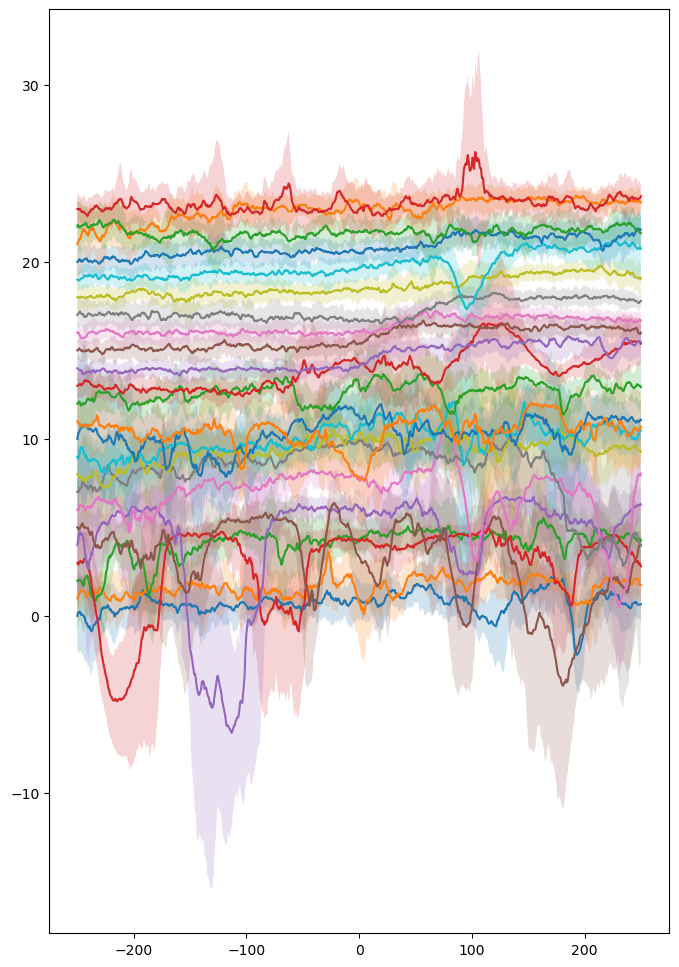

In [16]:
shift = 1
bmin, bmax = 150,250
mediandisp = {'perp':[],'par':[],'vert':[]}
medianad = {'perp':[],'par':[],'vert':[]}
trackdist = {'perp':[],'par':[],'vert':[]}
plt.figure(figsize=(8,12))
for track in [perptrack,partrack,verttrack]:
    for i,j in zip(track.id.unique(),mediandisp.keys()):
        prof = track[track.id==i]
        print(i,prof[bmin:bmax].stackmed.median()-prof[-bmax:-bmin].stackmed.median())
        mediandisp[j].append(prof[bmin:bmax].stackmed.median()-prof[-bmax:-bmin].stackmed.median())
        medianad[j].append(stats.median_abs_deviation(prof[bmin:bmax].stackmed.values-prof[-bmax:-bmin].stackmed.values))
        trackdist[j].append(dist*(i+1))
        plt.plot(prof.linedist,prof.stackmed-prof.stackmed.iloc[0]+i*shift)
        plt.fill_between(prof.linedist,(prof.stackmed-prof.stackmed.iloc[0]+i*shift)-prof.MAD,(prof.stackmed-prof.stackmed.iloc[0]+i*shift)+prof.MAD,alpha=0.2)

#plt.ylim([-6,i*shift+6])

(-3.0, 3.0)

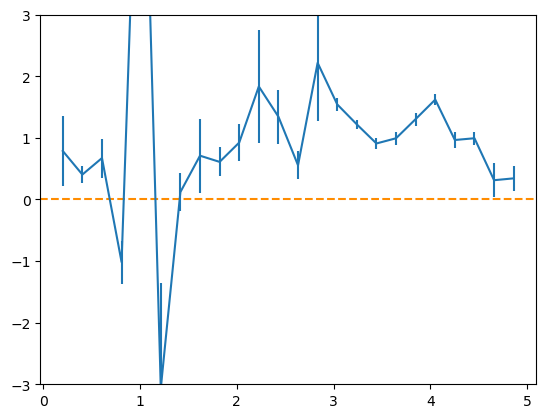

In [20]:
plt.errorbar(np.array(trackdist)/1000,-1*np.array(mediandisp),yerr=medianad)
plt.axhline(0,linestyle='--',c='darkorange')
plt.ylim(-3, 3)

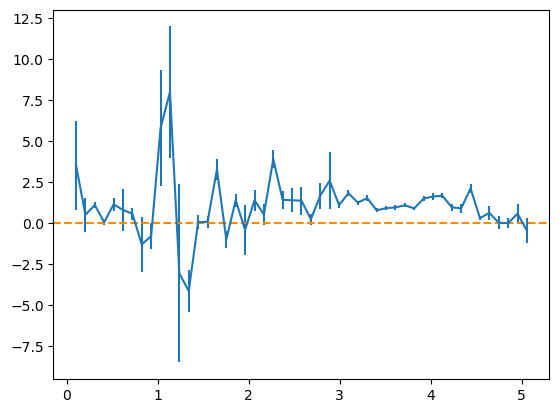

In [35]:
plt.errorbar(np.array(trackdist)/1000,-1*np.array(mediandisp),yerr=medianad)
plt.axhline(0,linestyle='--',c='darkorange')

In [32]:
dispmap = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp4326.tif'
region = [78.56602,78.64249,41.14197,41.17727]#[798985.5,805640.5,4560833.3,4564588.5]
fig = pygmt.Figure()
# Set up basic map
fig.basemap(
    region=region,
    projection="M12c",  # Mercator projection with a width of 12 centimeters
    frame="af",
)
fig.grdimage(dispmap,cmap=['blue,white,red'])

fig.show()

AttributeError: 'Figure' object has no attribute 'grdtrack'

In [15]:
region = [78.56602,78.64191,41.14197,41.16513]
fig = pygmt.Figure()
# Set up basic map
fig.basemap(
    region=region,
    projection="U52R/12c",  # Mercator projection with a width of 12 centimeters
    frame="af",
)
# Download grid for Earth relief with a resolution of 10 arc-minutes and
# gridline registration [Default]
grid_map = pygmt.datasets.load_earth_relief(
    resolution="10m",
    region=region_map,
)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lower-case "j") with justification
    # Bottom Right and an offset ("+o") of 0.7 centimeters and
    # 0.3 centimeters in x or y directions, respectively
    # Move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w5c/0.3c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and
    # a transparency ("@") of 30 % and with a 0.8-points thick black
    # outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)

# Choose a survey line
fig.plot(
    x=[126, 146],  # Longitude in degrees East
    y=[42, 40],  # Latitude in degrees North
    # Draw a 2-points thick red dashed line for the survey line
    pen="2p,red,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[126, 146],
    y=[42, 40],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin 12.5 centimeters to the top
fig.shift_origin(yshift="12.5c")

fig.basemap(
    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and
    # a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l")
    # at the west or left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 15],
    y=[7000, 7000],
    text=["A", "B"],
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line
# and store them in a pandas.DataFrame
track_df = pygmt.project(
    center="126/42",  # Start point of survey line (longitude/latitude)
    endpoint="146/40",  # End point of survey line (longitude/latitude)
    generate="0.1",  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid
# and add it as new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(
    grid=grid_map,
    points=track_df,
    newcolname="elevation",
)

# Plot water masses
fig.plot(
    x=[0, 15],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick black solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick black solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

fig.show()
# Main profile
# 78.5842320602900202,41.1471762414386362 : 78.6333048828235803,41.1682588689903000

fig.show()

NameError: name 'region_map' is not defined

In [ ]:
# Profile stacking
def profileExtract():
    '''Reads in a tif file and extracts displacements from the profile'''

def profileStack():

In [ ]:
# Select two points to calcualte profiles
# 800761.8,4561322.0;804785.0,4563820.4
